In [2]:
import pandas as pd
import numpy as np

import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.client import device_lib

Using TensorFlow backend.


### Device

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8539988895483758697
]


### Get data

In [4]:
FILEPATH = 'data/data.csv'
df = pd.read_csv(FILEPATH, header=None)
df.head()

input_data = np.array(df)

### Model Generation

In [5]:
models = []
for depth in range(0,32):
    model = Sequential()
    model.add(Dense(units=352, input_dim = 352))
    for i in range(depth):
        model.add(Dense(units=352))
    model.add(Dense(units=1))
    
    models.append(model)

### Calculate Inference Time

In [6]:
inference_times = []
for model in models:
    start = time.time()
    x  = model.predict(input_data)
    inference_time = time.time()-start
    inference_times.append(inference_time)

In [7]:
FIGUREPATH = "figure/inference_32_3.png"

### Save figure

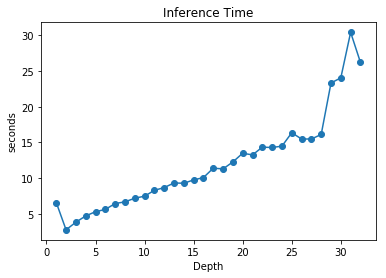

In [8]:
plt.title("Inference Time")
plt.xlabel("Depth")
plt.ylabel("seconds")
plt.scatter([i for i in range(1,33)],inference_times)
plt.plot([i for i in range(1,33)],inference_times)
# plt.hist(inference_times)
plt.savefig(FIGUREPATH)
plt.show()